# Semester 1 Project Submission



## Elliot

### The Movie Database Data Cleanse

In [114]:
#import needed libraries
import pandas as pd

In [115]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()
#convert genre_ids to name
#df.where()

tmdb_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [116]:
#information regarding The Movie Database
tmdb_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          23036 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   popularity         25497 non-null  float64       
 4   release_date       25497 non-null  datetime64[ns]
 5   title              25497 non-null  object        
 6   vote_average       25497 non-null  float64       
 7   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.8+ MB


In [117]:
#check to see if there any null values
tmdb_movie_db.isnull().sum()

genre_ids            2461
id                      0
original_language       0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [118]:
#check to see that there are no duplicates
tmdb_movie_db.duplicated().value_counts() 

False    25497
dtype: int64

In [119]:
#view shape of data
tmdb_movie_db.shape

(25497, 8)

### The Numbers Data Cleanse

In [120]:
#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()
#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])
#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')
#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)
#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)
#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,1.789430,6.532577,335507625,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,0.587101,2.546673,-169536125,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.122178,0.427892,-307237650,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.388403,4.243841,128405868,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.956408,4.153696,303181382,9.997217e+08
...,...,...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0.000000e+00,0.000000,0.000000,-7000,-7.000000e+03
79,1999-04-02,Following,6000,48482,2.404950e+05,8.080333,40.082500,42482,2.344950e+05
80,2005-07-13,Return to the Land of Wonders,5000,1338,1.338000e+03,0.267600,0.267600,-3662,-3.662000e+03


In [121]:
#information regarding The Numbers
tn_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        5782 non-null   datetime64[ns]
 1   movie               5782 non-null   object        
 2   production_budget   5782 non-null   int32         
 3   domestic_gross      5782 non-null   int32         
 4   worldwide_gross     5782 non-null   float64       
 5   dom_gross / budget  5782 non-null   float64       
 6   ww_gross / budget   5782 non-null   float64       
 7   dom_profit          5782 non-null   int32         
 8   profit              5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(3), object(1)
memory usage: 384.0+ KB


In [122]:
#check to see if there any null values
tn_movie_db.isnull().sum()

release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
dom_gross / budget    0
ww_gross / budget     0
dom_profit            0
profit                0
dtype: int64

In [123]:
#check to see that there are no duplicates
tn_movie_db.duplicated().value_counts() 

False    5782
dtype: int64

In [124]:
#view shape of data
tn_movie_db.shape

(5782, 9)

### Data Visualization

Merge both tables to combine data to connect genres to production costs and boxoffice revenue

In [125]:
#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')


#drop null values
movie_db = movie_db.dropna()

movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,"[53, 18, 27]",510284,en,5.972,2019-02-01,Braid,6.4,18,1660000.0,0.0,80745.0,0.000000,0.048642,-1660000.0,-1579255.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0
23907,"[18, 35, 28, 80]",506971,ur,4.486,2018-07-20,Teefa in Trouble,7.6,11,1500000.0,0.0,98806.0,0.000000,0.065871,-1500000.0,-1401194.0


Remove outliers

In [146]:
#check to see if worldwide_gross and domestic_gross is 0 to remove outliers
dcount = 0
for x in movie_db['domestic_gross']:
    if x == 0:
        dcount += 1
print(dcount)

wwcount = 0
for x in movie_db['worldwide_gross']:
    if x == 0:
        wwcount += 1
print(wwcount)


0
0


In [132]:
#remove values that have 0 in the domestic_gross column
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


In [147]:
#check to make sure that there are no values with 0
new_movie_db.loc[movie_db['worldwide_gross'] < 1]
sorted(new_movie_db['worldwide_gross'].value_counts().index.to_list())

[528.0,
 1632.0,
 2602.0,
 3301.0,
 4327.0,
 5073.0,
 6870.0,
 7396.0,
 7556.0,
 8374.0,
 17061.0,
 25935.0,
 28468.0,
 28864.0,
 29384.0,
 42557.0,
 47552.0,
 59696.0,
 61847.0,
 63014.0,
 70958.0,
 72277.0,
 94812.0,
 96734.0,
 101053.0,
 113169.0,
 120016.0,
 143658.0,
 144822.0,
 146149.0,
 150191.0,
 161097.0,
 168832.0,
 171962.0,
 172867.0,
 176262.0,
 182695.0,
 184705.0,
 205298.0,
 223652.0,
 229653.0,
 237688.0,
 261364.0,
 277943.0,
 288751.0,
 314444.0,
 331000.0,
 340930.0,
 355919.0,
 373375.0,
 407100.0,
 408159.0,
 413733.0,
 424149.0,
 433732.0,
 437002.0,
 437089.0,
 478595.0,
 531806.0,
 549185.0,
 549632.0,
 567219.0,
 595018.0,
 606162.0,
 615816.0,
 623292.0,
 648599.0,
 700261.0,
 731613.0,
 772366.0,
 786532.0,
 797439.0,
 834953.0,
 852399.0,
 868081.0,
 873617.0,
 890303.0,
 922727.0,
 958978.0,
 978527.0,
 1022453.0,
 1027760.0,
 1069454.0,
 1075009.0,
 1110511.0,
 1148578.0,
 1156309.0,
 1158877.0,
 1165996.0,
 1188194.0,
 1199510.0,
 1200346.0,
 1217307.0,

In [129]:
movie_db.dtypes

genre_ids                     object
id                             int64
original_language             object
popularity                   float64
release_date          datetime64[ns]
title                         object
vote_average                 float64
vote_count                     int64
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
dom_gross / budget           float64
ww_gross / budget            float64
dom_profit                   float64
profit                       float64
dtype: object

In [108]:

#table = pd.concat([tmdb_movie_db, tn_movie_db], axis = 1)
#tmdb_movie_db.join(tn_movie_db, how = 'outer')
#tn_movie_db.merge(tmdb_movie_db, how = 'left')

#tmdb_movie_db.iloc[0].title
#tn_movie_db

#df.loc[df['column_name'].isin(some_values)]

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0


In [16]:
# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [107]:
#information regarding genres
movie_db['genre_ids'].value_counts()

[18]                      91
[35]                      72
[35, 18]                  38
[18, 10749]               33
[27, 53]                  26
                          ..
[878, 53, 18]              1
[14, 10751, 10402, 18]     1
[35, 10749, 27]            1
[12, 18, 10749]            1
[28, 12, 16]               1
Name: genre_ids, Length: 473, dtype: int64

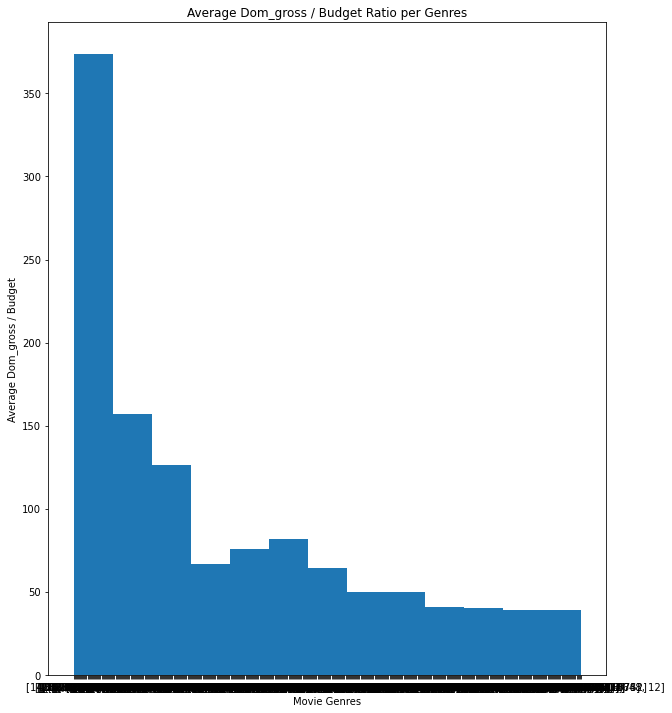

In [113]:
fig, ax = plt.subplots(figsize=(10, 12))

#ax.hist(movie_db['dom_gross / budget'].mean(), 10, tick_label = movie_db['genre_ids'])
ax.hist(movie_db['genre_ids'], bins='auto')

ax.set_title('Average Dom_gross / Budget Ratio per Genres')
ax.set_ylabel('Average Dom_gross / Budget')
ax.set_xlabel('Movie Genres');



#x = movie_db['genre_ids']

#y = movie_db['dom_gross / budget'].mean()

#plt.hist(x, bins = 1000, edgecolor='black', color='#00C8AD')
#plt.xlabel('Movie Genres')
#plt.ylabel('Average Dom_gross / Budget')
#plt.title('Average Dom_gross / Budget Ratio per Genres')
#plt.show()

In [ ]:
x = movie_db['genre_ids']

y = movie_db['ww_gross / budget'].mean()

plt.hist(x, bins = 50, edgecolor='black')
plt.xlabel('Movie Genres')
plt.ylabel('Average WW_gross / Budget')
plt.title('Average WW_gross / Budget Ratio per Genres')
plt.show()

In [ ]:
(profit per genre)

df_mr1.value_counts('genres').nlargest(12)

for z test
df_mr1.describe()


## Ian

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Frida

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## John

In [ ]:
# Your code here - remember to use markdown cells for comments as well!